# Gdelt Dataset: Events, Mentions, and Global Knowledge Graph

http://data.gdeltproject.org/gdeltv2/masterfilelist.txt

http://data.gdeltproject.org/documentation/GDELT-Event_Codebook-V2.0.pdf

In [2]:
ls

20190517211500.export.CSV.zip
20190517211500.gkg.csv.zip
20190517211500.mentions.CSV.zip
20211105.export.CSV
GDELT Wrangler - Clean.ipynb.txt
GDELT_2.0_Events_Column_Labels_Header_Row_Sep2016.csv
events-mentions-global-knowledge-graph.ipynb
memoria.pdf


In [1]:
import pandas as pd

## Events

In [2]:
names = pd.read_csv('data/GDELT_2.0_Events_Column_Labels_Header_Row_Sep2016.csv')
names

,tableId,dataType,Empty,Description
0,GLOBALEVENTID,INTEGER,NULLABLE,Globally unique identifier assigned to each ev...
1,SQLDATE,INTEGER,NULLABLE,Date the event took place in YYYYMMDD format. ...
2,MonthYear,INTEGER,NULLABLE,"Alternative formatting of the event date, in Y..."
3,Year,INTEGER,NULLABLE,"Alternative formatting of the event date, in Y..."
4,FractionDate,FLOAT,NULLABLE,"Alternative formatting of the event date, comp..."
...,...,...,...,...
56,ActionGeo_Lat,FLOAT,NULLABLE,This is the centroid latitude of the landmark ...
57,ActionGeo_Long,FLOAT,NULLABLE,This is the centroid longitude of the landmark...
58,ActionGeo_FeatureID,STRING,NULLABLE,This is the GNS or GNIS FeatureID for this loc...
59,DATEADDED,INTEGER,NULLABLE,This field stores the date the event was added...


In [3]:
print(*names['tableId'])

GLOBALEVENTID SQLDATE MonthYear Year FractionDate Actor1Code Actor1Name Actor1CountryCode Actor1KnownGroupCode Actor1EthnicCode Actor1Religion1Code Actor1Religion2Code Actor1Type1Code Actor1Type2Code Actor1Type3Code Actor2Code Actor2Name Actor2CountryCode Actor2KnownGroupCode Actor2EthnicCode Actor2Religion1Code Actor2Religion2Code Actor2Type1Code Actor2Type2Code Actor2Type3Code IsRootEvent EventCode EventBaseCode EventRootCode QuadClass GoldsteinScale NumMentions NumSources NumArticles AvgTone Actor1Geo_Type Actor1Geo_FullName Actor1Geo_CountryCode Actor1Geo_ADM1Code Actor1Geo_ADM2Code Actor1Geo_Lat Actor1Geo_Long Actor1Geo_FeatureID Actor2Geo_Type Actor2Geo_FullName Actor2Geo_CountryCode Actor2Geo_ADM1Code Actor2Geo_ADM2Code Actor2Geo_Lat Actor2Geo_Long Actor2Geo_FeatureID ActionGeo_Type ActionGeo_FullName ActionGeo_CountryCode ActionGeo_ADM1Code ActionGeo_ADM2Code ActionGeo_Lat ActionGeo_Long ActionGeo_FeatureID DATEADDED SOURCEURL


In [4]:
# 读取15分钟的数据
df = pd.read_csv("/Users/datalab/bigdata/gdelt_data/20190517211500.export.CSV.zip",
                 sep= '\t', names = names['tableId'])

In [5]:
df

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,846073409,20180517,201805,2018,2018.3753,NaN,NaN,NaN,NaN,NaN,...,4,"Sunamganj, Sylhet, Bangladesh",BG,BG86,5823,25.0667,91.4000,-2737975,20190517211500,https://en.prothomalo.com/bangladesh/news/1957...
1,846073410,20180517,201805,2018,2018.3753,BGD,BANGLADESH,BGD,NaN,NaN,...,4,"Hakaluki Haor, Bangladesh (general), Bangladesh",BG,BG00,5824,24.6667,92.0667,-2721111,20190517211500,https://en.prothomalo.com/bangladesh/news/1957...
2,846073411,20180517,201805,2018,2018.3753,BGD,BANGLADESH,BGD,NaN,NaN,...,4,"Sylhet, Sylhet, Bangladesh",BG,BG86,5824,24.8967,91.8717,-2737987,20190517211500,https://en.prothomalo.com/bangladesh/news/1957...
3,846073412,20180517,201805,2018,2018.3753,BUS,PRODUCER,NaN,NaN,NaN,...,2,"New York, United States",US,USNY,NaN,42.1497,-74.9384,NY,20190517211500,https://dailytimes.com.pk/396172/shahrukh-khan...
4,846073413,20180517,201805,2018,2018.3753,EDU,SCHOOL,NaN,NaN,NaN,...,2,"Florida, United States",US,USFL,NaN,27.8333,-81.7170,FL,20190517211500,https://wrex.com/category/2019/05/17/florida-s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,846075026,20190517,201905,2019,2019.3753,sco,SCOTTISH,NaN,NaN,sco,...,1,Russia,RS,RS,NaN,60.0000,100.0000,RS,20190517211500,https://2paragraphs.com/2019/05/gene-simmons-e...
1618,846075027,20190517,201905,2019,2019.3753,sco,SCOTTISH,NaN,NaN,sco,...,1,Russia,RS,RS,NaN,60.0000,100.0000,RS,20190517211500,https://2paragraphs.com/2019/05/gene-simmons-e...
1619,846075028,20190517,201905,2019,2019.3753,tms,TAMA,NaN,NaN,tms,...,2,"Iowa, United States",US,USIA,NaN,42.0046,-93.2140,IA,20190517211500,https://www.timesrepublican.com/news/todays-ne...
1620,846075029,20190517,201905,2019,2019.3753,tms,TAMA,NaN,NaN,tms,...,3,"Marshall County, Iowa, United States",US,USIA,NaN,42.0333,-93.0008,465252,20190517211500,https://www.timesrepublican.com/news/todays-ne...


In [6]:
import numpy as np
import seaborn as sns
import pylab as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号, 注意['SimHei']对应这句不行.

All GDELTAll GDELT Event Files http://data.gdeltproject.org/events/index.html

Codebook http://data.gdeltproject.org/documentation/GDELT-Event_Codebook-V2.0.pdf

In [11]:
# 读取一天的数据
df = pd.read_csv('/Users/datalab/bigdata/gdelt_data/20211105.export.CSV', 
                 sep= '\t', names =  names['tableId'])

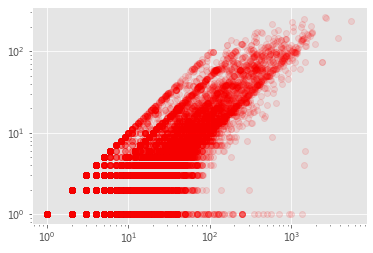

In [12]:
plt.style.use('ggplot')
plt.plot(df['NumMentions'], df['NumSources'], 'ro', alpha = 0.1)
plt.xscale('log')
plt.yscale('log');

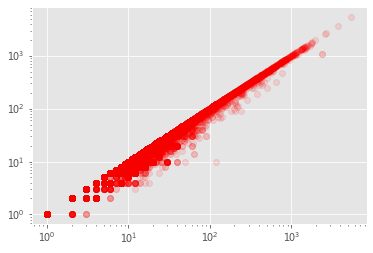

In [13]:
plt.style.use('ggplot')
plt.plot(df['NumMentions'], df['NumArticles'], 'ro', alpha = 0.1)
plt.xscale('log')
plt.yscale('log');

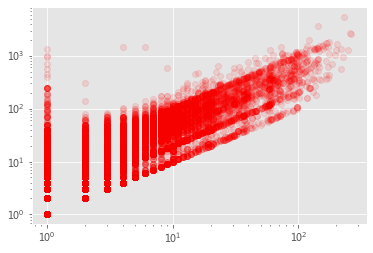

In [14]:
plt.style.use('ggplot')
plt.plot(df['NumSources'], df['NumArticles'], 'ro', alpha = 0.1)
plt.xscale('log')
plt.yscale('log');

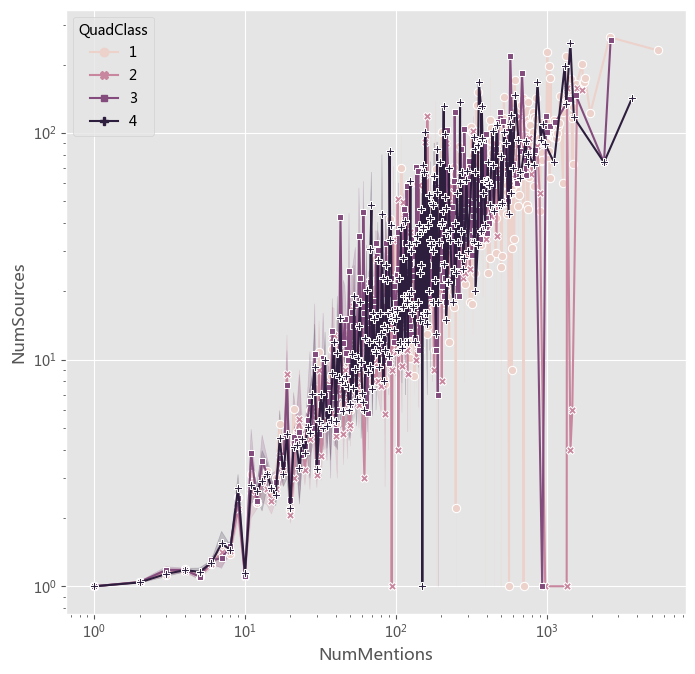

In [15]:
plt.figure(figsize =(8, 8), dpi = 100)

sns.lineplot(data = df, x = 'NumMentions', y = 'NumSources', 
             hue = 'QuadClass', style = 'QuadClass',
            markers=True, dashes=False
            )
plt.xscale('log')
plt.yscale('log')
plt.show()

## Mentions

The Mentions table is a new addition to GDELT 2.0 and records each mention of the events in the Event
table, making it possible to track the trajectory and network structure of a story as it flows through the
global media system. 

Each mention of an event receives its own entry in the Mentions table. 

- an event which is mentioned in 100 articles will be listed 100 times in the Mentions table. 

- Mentions are recorded irrespective of the date of the original event, meaning that a mention today of an event from a year ago will still be recorded, making it possible to trace discussion of “anniversary events” or historical events being recontextualized into present actions. 

- If a news report mentions multiple events, each mention is recorded separately in this table. 


As an event is mentioned across multiple news reports, each of those mentions is recorded in the Mentions table, along with several key indicators about that mention, including the location within the article where the mention appeared (in the lead paragraph versus being buried at the bottom) and the “confidence” of the algorithms in their identification of the event
from that specific news report. 

In [42]:
mnames = pd.read_csv('mentions.csv')
mnames

,name,type,description
0,GLOBALEVENTID,INTEGER,This is the ID of the event that was mentioned...
1,EventTimeDate,INTEGER,This is the 15-minute timestamp (YYYYMMDDHHMMS...
2,MentionTimeDate,INTEGER,This is the 15-minute timestamp (YYYYMMDDHHMMS...
3,MentionType,INTEGER,This is a numeric identifier that refers to th...
4,MentionSourceName,STRING,This is a human-friendly identifier of the sou...
5,MentionIdentifier,STRING,This is the unique external identifier for the...
6,SentenceID,INTEGER,The sentence within the article where the even...
7,Actor1CharOffset,INTEGER,The location within the article (in terms of E...
8,Actor2CharOffset,INTEGER,The location within the article (in terms of E...
9,ActionCharOffset,INTEGER,The location within the article (in terms of E...


In [43]:
dm = pd.read_csv("20190517211500.mentions.CSV.zip", sep= '\t', names = mnames['name'])


In [44]:
dm

,GLOBALEVENTID,EventTimeDate,MentionTimeDate,MentionType,MentionSourceName,MentionIdentifier,SentenceID,Actor1CharOffset,Actor2CharOffset,ActionCharOffset,InRawText,Confidence,MentionDocLen,MentionDocTone,MentionDocTranslationInfo,Extras
0,846073409,20190517211500,20190517211500,1,prothomalo.com,https://en.prothomalo.com/bangladesh/news/1957...,1,-1,124,139,1,100,2277,0.546448,NaN,NaN
1,846052753,20190517191500,20190517211500,1,calgarysun.com,https://calgarysun.com/news/crime/macs-killer-...,16,-1,3395,3422,1,100,4000,-3.863988,NaN,NaN
2,846041561,20190517181500,20190517211500,1,azcentral.com,https://www.azcentral.com/story/travel/news/20...,12,-1,3274,3176,0,10,6917,-2.144772,NaN,NaN
3,846041562,20190517181500,20190517211500,1,wtop.com,https://wtop.com/latin-america/2019/05/cuba-be...,7,-1,2621,2523,1,50,6332,-2.198853,NaN,NaN
4,846041562,20190517181500,20190517211500,1,azcentral.com,https://www.azcentral.com/story/travel/news/20...,12,-1,3274,3176,1,40,6917,-2.144772,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8183,846075026,20190517211500,20190517211500,1,2paragraphs.com,https://2paragraphs.com/2019/05/gene-simmons-e...,1,398,664,651,0,20,1305,3.448276,NaN,NaN
8184,846075027,20190517211500,20190517211500,1,2paragraphs.com,https://2paragraphs.com/2019/05/gene-simmons-e...,1,398,606,595,1,60,1305,3.448276,NaN,NaN
8185,846075028,20190517211500,20190517211500,1,timesrepublican.com,https://www.timesrepublican.com/news/todays-ne...,5,1087,-1,1150,1,10,2730,-7.226107,NaN,NaN
8186,846075029,20190517211500,20190517211500,1,timesrepublican.com,https://www.timesrepublican.com/news/todays-ne...,5,1087,1200,1175,0,10,2730,-7.226107,NaN,NaN



## Knowledge Graph

https://github.com/linwoodc3/gdeltPyR/blob/master/data/gkg2.csv


In [32]:
gnames = pd.read_csv('gkg2.csv')
gnames

,name,type,description
0,GKGRECORDID,STRING,Each GKG record is assigned a globally unique ...
1,DATE,INTEGER,This is the date in YYYYMMDDHHMMSS format on w...
2,SourceCollectionIdentifier,INTEGER,This is a numeric identifier that refers to th...
3,SourceCommonName,STRING,This is a human-friendly identifier of the sou...
4,DocumentIdentifier,STRING,This is the unique external identifier for the...
5,Counts,STRING,This is the list of Counts found in this docum...
6,V2Counts,STRING,This field is identical to the V1COUNTS field ...
7,Themes,STRING,This is the list of all Themes found in the do...
8,V2Themes,STRING,This contains a list of all GKG themes referen...
9,Locations,STRING,This is a list of all locations found in the t...


In [37]:
dg = pd.read_csv('20190517211500.gkg.csv.zip', sep = '\t', names = gnames['name'])

In [38]:
dg

,GKGRECORDID,DATE,SourceCollectionIdentifier,SourceCommonName,DocumentIdentifier,Counts,V2Counts,Themes,V2Themes,Locations,...,GCAM,SharingImage,RelatedImages,SocialImageEmbeds,SocialVideoEmbeds,Quotations,AllNames,Amounts,TranslationInfo,Extras
0,20190517211500-0,20190517211500,1,wicc600.com,http://www.wicc600.com/winners/,NaN,NaN,ECON_TAXATION;USPEC_POLICY1;EPU_POLICY;EPU_POL...,"ECON_TAXATION,124;USPEC_POLICY1,124;EPU_POLICY...",NaN,...,"wc:126,c12.1:15,c12.10:6,c12.12:4,c12.13:4,c12...",NaN,NaN,NaN,NaN,NaN,NaN,"600,dollars ,203;",NaN,<PAGE_AUTHORS>mboyd</PAGE_AUTHORS>
1,20190517211500-1,20190517211500,1,hot1073jamz.com,https://hot1073jamz.com/report-whataburger-is-...,NaN,NaN,NaN,NaN,"2#Arkansas, United States#US#USAR#34.9513#-92....",...,"wc:204,c12.1:8,c12.10:10,c12.12:2,c12.13:7,c12...",https://townsquare.media/site/156/files/2017/0...,NaN,NaN,https://youtube.com/watch?v=9zCZ8WRnG4U;https:...,NaN,"New Mexico,427;Morgan Stanley,821;Corpus Chris...","820,locations,189;670,of which,202;7,nationall...",NaN,<PAGE_LINKS>https://www.mysanantonio.com/busin...
2,20190517211500-2,20190517211500,1,thewesterlysun.com,https://www.thewesterlysun.com/news/state/seri...,NaN,NaN,TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_MASSACHU...,"GENERAL_GOVERNMENT,639;EPU_POLICY_GOVERNMENT,6...","3#Pittsfield, Vermont, United States#US#USVT#4...",...,"wc:134,c12.1:9,c12.10:9,c12.12:4,c12.13:4,c12....",https://bloximages.newyork1.vip.townnews.com/t...,NaN,NaN,https://youtube.com/user/sunpublishingco/videos;,NaN,"Berkshire Eagle,254;Phillip Jordan,295","6,months,183;23,at the Canadian border,344;",NaN,<PAGE_LINKS>http://www.berkshireeagle.com;http...
3,20190517211500-3,20190517211500,1,zerohedge.com,https://www.zerohedge.com/news/2019-05-17/here...,NaN,NaN,EPU_ECONOMY;EPU_ECONOMY_HISTORIC;WB_698_TRADE;...,"SANITATION,4617;ARMEDCONFLICT,90;ARMEDCONFLICT...",1#China#CH#CH#35#105#CH;1#United States#US#US#...,...,"wc:1034,c1.2:12,c1.4:1,c12.1:112,c12.10:109,c1...",https://zh-prod-1cc738ca-7d3b-4a72-b792-20bd8d...,NaN,NaN,NaN,2735|72||sometimes struggle to afford housing ...,"Atlanta Fed,2517;Urban Institute,2706;Marc Cha...","2,largest economies on the,495;15,numbers,1001...",NaN,<PAGE_LINKS>http://theeconomiccollapseblog.com...
4,20190517211500-4,20190517211500,1,politicususa.com,https://www.politicususa.com/2019/05/17/when-c...,NaN,NaN,MEDIA_MSM;LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDE...,"TAX_POLITICAL_PARTY_REPUBLICANS,544;TAX_POLITI...","2#New York, United States#US#USNY#42.1497#-74....",...,"wc:1479,c1.1:1,c1.4:1,c12.1:166,c12.10:192,c12...",https://www.politicususa.com/wp-content/upload...,NaN,NaN,NaN,NaN,"Editor-In-Chief Sarah,65;Donald Trump,412;Sena...","2,Telly Awards,7466;",NaN,<PAGE_PRECISEPUBTIMESTAMP>20190517155200</PAGE...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,20190517211500-2756,20190517211500,1,sfgate.com,https://www.sfgate.com/nation/article/House-pa...,NaN,NaN,LEADER;USPEC_POLITICS_GENERAL1;SELF_IDENTIFIED...,"LEADER,68;LEADER,2080;USPEC_POLITICS_GENERAL1,...",1#United States#US#US#39.828175#-98.5795#US;3#...,...,"wc:397,c1.1:1,c1.4:1,c12.1:36,c12.10:46,c12.12...",https://s.hdnux.com/photos/01/02/52/37/1747553...,NaN,NaN,NaN,NaN,"Mark Takano,17;Chad Griffin,70;Human Rights Ca...","8,Republicans,1106;",NaN,<PAGE_AUTHORS>Matthew Daly</PAGE_AUTHORS><PAGE...
2757,20190517211500-2757,20190517211500,1,joker.com,https://joker.com/?mode=order&do_next=landingp...,NaN,NaN,EPU_ECONOMY_HISTORIC;TAX_FNCACT;TAX_FNCACT_REG...,"TAX_FNCACT_REGISTRAR,66;EPU_ECONOMY_HISTORIC,4...",NaN,...,"wc:36,c12.1:6,c12.10:1,c12.14:1,c12.3:3,c12.4:...",NaN,NaN,NaN,NaN,NaN,"About Joker,13",NaN,NaN,NaN
2758,20190517211500-2758,20190517211500,1,thesun.co.uk,https://www.thesun.co.uk/fabulous/9096246/worl...,NaN,NaN,TAX_FNCACT;TAX_FNCACT_DESIGNER;MEDIA_SOCIAL;TA...,"TAX_WORLDFISH_SUCKER,2436;TAX_WORLDFISH_SUCKER...",1#Jamaica#JM#JM#18.25#-77.5#JM;1#United Kingdo...,...,"wc:515,c1.1:3,c12.1:64,c12.10:35,c12.12:9,c12....",https

In [47]:
dg.iloc[2]

GKGRECORDID                                                    20190517211500-2
DATE                                                             20190517211500
SourceCollectionIdentifier                                                    1
SourceCommonName                                             thewesterlysun.com
DocumentIdentifier            https://www.thewesterlysun.com/news/state/seri...
Counts                                                                      NaN
V2Counts                                                                    NaN
Themes                        TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_MASSACHU...
V2Themes                      GENERAL_GOVERNMENT,639;EPU_POLICY_GOVERNMENT,6...
Locations                     3#Pittsfield, Vermont, United States#US#USVT#4...
V2Locations                   2#Vermont, United States#US#USVT##44.0407#-72....
Persons                                                                     NaN
V2Persons                               